In [1]:
import pandas as pd
import os

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [3]:
root_dir = "/home/jiraki/Workspaces/merchant_segment"
data_dir = "data/raw/segment_data_new"
filename_list = os.listdir(os.path.join(root_dir, data_dir))

In [ ]:
filename = "KCC_201801.csv"

In [ ]:
df = pd.read_csv(os.path.join(root_dir, data_dir, filename))

In [4]:
total_df = pd.DataFrame()
for filename in filename_list:
    print(filename)
    df = pd.read_csv(os.path.join(root_dir, data_dir, filename))
    total_df = pd.concat([total_df, df])

KFC_201810.csv
KFC_201811.csv
KCC_201809.csv
KCC_201810.csv
KCC_201811.csv
TCS_201802.csv
TCS_201803.csv
TCS_201804.csv
TCS_201805.csv
KFC_201812.csv
TCS_201806.csv
TCS_201807.csv
TCS_201808.csv
TCS_201809.csv
TCS_201810.csv
TCS_201811.csv
KCC_201808.csv
KCC_201812.csv
TCS_201801.csv
TCS_201812.csv
GCS_201801.csv
KCC_201801.csv
GCS_201802.csv
KFC_201801.csv
KFC_201802.csv
KFC_201803.csv
KFC_201804.csv
KFC_201805.csv
KFC_201806.csv
KFC_201807.csv
KFC_201808.csv
KFC_201809.csv
GCS_201803.csv
GCS_201804.csv
GCS_201805.csv
GCS_201806.csv
GCS_201807.csv
GCS_201808.csv
GCS_201809.csv
GCS_201810.csv
GCS_201811.csv
GCS_201812.csv
KCC_201802.csv
KCC_201803.csv
KCC_201804.csv
KCC_201805.csv
KCC_201806.csv
KCC_201807.csv


In [ ]:
filename_list = ["KCC_201801.csv","KCC_201802.csv","KCC_201803.csv","KCC_201804.csv",
                 "KCC_201805.csv","KCC_201806.csv","KCC_201807.csv","KCC_201808.csv",
                 "KCC_201809.csv","KCC_201810.csv","KCC_201811.csv","KCC_201812.csv"]

In [ ]:
filename_list

In [5]:
df.head(5)

TXN_DATE_KEY  CUSTOMER_KEY  ACCOUNT_KEY  CATEGORY_CODE  TXN_AMOUNT  \
0     1/7/2018       2379050     20178685           7011      1100.0   
1     1/7/2018       2379050     20178685           3389      3445.0   
2     2/7/2018       2379050     20178685           5541      1000.0   
3     7/7/2018       2379050     20178685           5541       700.0   
4    10/7/2018       2379050     20178685           5411       254.0   

  ONLINEFLAG INTERFLAG     MERCHANT_LST TXN_GROUP  
0          N         N  HTEL_ACCOR_IBIS    RETAIL  
1          N         N        CRRN_AVIS    RETAIL  
2          N         N       PTRL_OTHER    RETAIL  
3          N         N       PTRL_OTHER    RETAIL  
4          N         N        HYPM_TOPS    RETAIL

In [6]:
df = df.drop(['TXN_GROUP'], axis=1)

In [7]:
# dropping null value columns to avoid errors 
df.dropna(inplace = True) 

# new data frame with split value columns 
new = df["MERCHANT_LST"].str.split("_", n = 1, expand = True) 

# making seperate first name column from new data frame 
df["MERCHANT_CAT"]= new[0] 

# making seperate last name column from new data frame 
df["MERCHANT_BASE"]= new[1] 

# Dropping old Name columns 
df.drop(columns =["MERCHANT_LST"], inplace = True) 

In [8]:
# raw_data.groupby('MERCHANT_CAT', as_index=False)[col_count_name].sum()
a = df.groupby('MERCHANT_CAT', as_index=False)['TXN_AMOUNT'].count()

In [9]:
b = df[df.MERCHANT_CAT == 'DINN'].copy()

In [10]:
b.head(10)

TXN_DATE_KEY  CUSTOMER_KEY  ACCOUNT_KEY  CATEGORY_CODE  TXN_AMOUNT  \
22     25/7/2018       2379061     20178705           5812      608.00   
34      8/7/2018       2409670     20212669           5812      385.00   
69     19/7/2018       2379067     20178713           5812     1777.50   
73      6/7/2018       2409675     20212678           5812     1410.26   
76     26/7/2018       2409675     20212678           5812     1904.40   
143     8/7/2018       2409695     20212722           5812     1296.00   
147    27/7/2018        773699     20212737           5812      955.50   
157     1/7/2018        269638     20129818           5812      797.00   
210    16/7/2018       1102756     20129867           5812     7442.00   
228    25/7/2018       1126093     20218870           5812     1050.00   

    ONLINEFLAG INTERFLAG MERCHANT_CAT   MERCHANT_BASE  
22           N         N         DINN          MKSUKI  
34           N         N         DINN            FUJI  
69           N         N         DINN    KASAJAPANESE  
73           N         N         DINN           OTHER  
76           N         N         DINN           OTHER  
143          N         N         DINN  OISHI_SHABUSHI  
147          N         N         DINN    KASAJAPANESE  
157          N         N         DINN          MKSUKI  
210          N         N         DINN           OTHER  
228          N         N         DINN           OTHER

In [11]:
c = b[b.MERCHANT_BASE!='OTHER']
min(c.TXN_AMOUNT)

-4110.08

In [12]:
c = c[c.TXN_AMOUNT > 0]

In [13]:
np.percentile(c.TXN_AMOUNT, 99.5)

4763.204999999987

In [14]:
q3 = np.percentile(c.TXN_AMOUNT, 75)
q1 = np.percentile(c.TXN_AMOUNT, 25)
IQR = q3-q1
p025 = np.percentile(c.TXN_AMOUNT, 2.5)
p975 = np.percentile(c.TXN_AMOUNT, 99.5)
print(p025, p975)

147.0 4763.204999999987


In [15]:
c = c[(c.TXN_AMOUNT >= p025) & (c.TXN_AMOUNT <= p975)]


In [16]:
from scipy import stats
stats.describe(c.TXN_AMOUNT)

DescribeResult(nobs=180384, minmax=(147.0, 4763.0), mean=842.2124735564129, variance=326588.600781893, skewness=2.1244236808901045, kurtosis=6.915889463889586)

[Text(0, 0, 'MKSUKI'),
 Text(0, 0, 'FUJI'),
 Text(0, 0, 'KASAJAPANESE'),
 Text(0, 0, 'OISHI_SHABUSHI'),
 Text(0, 0, 'NITTAYAKAI'),
 Text(0, 0, 'SIZZLER'),
 Text(0, 0, 'YAYOI'),
 Text(0, 0, 'SUSHIMASA'),
 Text(0, 0, 'BLACKCANYON'),
 Text(0, 0, 'PIZZAHUT'),
 Text(0, 0, 'BONCHON'),
 Text(0, 0, 'CRG_CHABUTON'),
 Text(0, 0, 'LAEMCHAROEN'),
 Text(0, 0, 'THEPIZZA'),
 Text(0, 0, 'SANTAFESTEAK'),
 Text(0, 0, 'STARBUCKS'),
 Text(0, 0, 'BARBQPLAZA'),
 Text(0, 0, 'ZEN_ON_TABLE'),
 Text(0, 0, 'CRG_PEPPERLUNCH'),
 Text(0, 0, 'ZEN_AKA'),
 Text(0, 0, 'ZEN_REST'),
 Text(0, 0, 'SP'),
 Text(0, 0, 'SEEFAH'),
 Text(0, 0, 'AUBONPAIN'),
 Text(0, 0, 'BOONTONGKEE'),
 Text(0, 0, 'HUAPLACHONG'),
 Text(0, 0, 'OISHI_GROUP'),
 Text(0, 0, 'NARAIPIZZARIA'),
 Text(0, 0, 'COCA'),
 Text(0, 0, 'SUKISHI_BUFFET'),
 Text(0, 0, 'DAKGALBI'),
 Text(0, 0, 'VIETCUISINE'),
 Text(0, 0, 'BURGERKING'),
 Text(0, 0, 'SAVOEY'),
 Text(0, 0, 'HUASENGHONG'),
 Text(0, 0, 'SWENSENS'),
 Text(0, 0, 'HONGMIN'),
 Text(0, 0, 'JEFFERSTEK'),
 Text

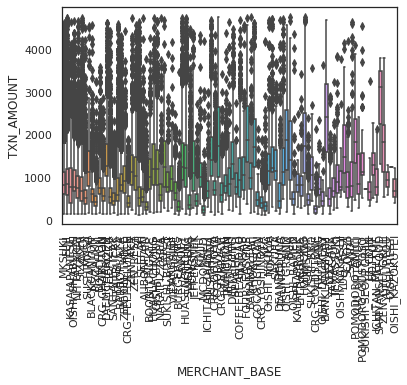

In [17]:
g = sns.boxplot(x="MERCHANT_BASE", y="TXN_AMOUNT", data=c)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [18]:
# new data frame with split value columns 
new = c["TXN_DATE_KEY"].str.split("/", n = 2, expand = True) 

# making seperate first name column from new data frame 
c["DAY"]= new[0]
c["MONTH"]= new[1]
c["YEAR"]= new[2]

In [19]:
c

TXN_DATE_KEY  CUSTOMER_KEY  ACCOUNT_KEY  CATEGORY_CODE  TXN_AMOUNT  \
22         25/7/2018       2379061     20178705           5812      608.00   
34          8/7/2018       2409670     20212669           5812      385.00   
69         19/7/2018       2379067     20178713           5812     1777.50   
143         8/7/2018       2409695     20212722           5812     1296.00   
147        27/7/2018        773699     20212737           5812      955.50   
157         1/7/2018        269638     20129818           5812      797.00   
279        17/7/2018        833689     20184614           5812      610.00   
301        14/7/2018       2395202     20184636           5812      817.00   
329         2/7/2018       2395210     20184647           5812      798.00   
337        14/7/2018       2395210     20184647           5812      673.00   
346        30/7/2018       2395210     20184647           5812      413.00   
396         4/7/2018        644103     20184694           5812     1930.00   
537        22/7/2018         98998     20003913           5814      651.00   
539        23/7/2018         98998     20003913           5812      812.00   
598        30/7/2018       2289396     20003956           5814      578.00   
600         6/7/2018       2440997     20306539           5812      671.00   
613        28/7/2018       2440999     20306545           5812      833.00   
649        14/7/2018       2289403     20003971           5812      839.00   
681        21/7/2018       2296766     20017489           5812     1113.00   
684        18/7/2018       2296766     20017489           5812      503.76   
686        30/7/2018       2296766     20017489           5812      204.00   
748         1/7/2018       2441360     20307269           5812     1732.00   
801         6/7/2018       2098424     20017587           5812      809.00   
845        25/7/2018       2289778     20004740           5814      843.00   
865        15/7/2018       1300176     20307338           5812     1403.00   
867        22/7/2018       1300176     20307338           5812      558.00   
868        22/7/2018       1300176     20307338           5812      962.00   
877        20/7/2018       1943899     20307352           5814      300.00   
903        30/7/2018        756694     20004758           5812     1037.00   
904        28/7/2018        756694     20004758           5814      647.00   
...              ...           ...          ...            ...         ...   
4596417     2/7/2018       9081875    197374286           5814      335.07   
4596528     3/7/2018       7723070     21355535           5814      199.00   
4596601    21/7/2018       7700511     22785657           5812      556.00   
4596660    22/7/2018       7492326     21850361           5812      760.00   
4596669    18/7/2018       7389529    110138700           5814      410.00   
4596688    14/7/2018       5620472    196582889           5812     1135.81   
4596744     9/7/2018        964669     21551251           5812     1217.66   
4596783     3/7/2018       8186573     21510778           5814     1360.41   
4596795    27/7/2018       8186573     21510778           5812     1559.80   
4596796    30/7/2018       8186573     21510778           5814     1000.00   
4596798    16/7/2018       4128573     20623238           5812      399.00   
4596822     7/7/2018       7528709     21866610           5812      955.00   
4596873    17/7/2018       8246993     21829422           5812      500.00   
4596891    15/7/2018        321962     22146763           5812      820.00   
4596893    15/7/2018        680063     21782232           5812      856.00   
4596966    14/7/2018       2361614     22637413           5812     1354.73   
4597017     8/7/2018       8742263     22495490           5812      780.00   
4597018    26/7/2018       8742263     22495490           5812      509.00   
4597028    21/7/2018       4561389     22496333           5812     1596.00   
4597041     2/7/2018       329

In [20]:
from dfply import *
d = (c >>
     group_by(X.MERCHANT_BASE, X.YEAR, X.MONTH) >> 
     summarize(mean_txn_amount = X.TXN_AMOUNT.mean(),
              min_txn_amount = X.TXN_AMOUNT.min(),
              max_txn_amount = X.TXN_AMOUNT.max())
    )

In [38]:
from sklearn import preprocessing

x = d[['mean_txn_amount', 'min_txn_amount', 'max_txn_amount']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [39]:
df

0         1         2
0   0.202822  0.174979  0.625156
1   0.032134  0.000845  0.757410
2   0.338192  0.032122  1.000000
3   0.880712  0.359256  0.983811
4   0.258089  0.002536  0.890411
5   0.139807  0.000845  0.951930
6   0.228066  0.024091  0.707223
7   0.361102  0.053254  0.874471
8   0.572101  0.298394  0.999253
9   0.033360  0.000000  0.678456
10  0.645028  0.053254  0.966625
11  0.453598  0.127642  0.983562
12  0.100695  0.006762  0.350685
13  0.338200  0.006205  0.982316
14  0.140645  0.001691  0.525529
15  0.013974  0.000845  0.346700
16  0.200527  0.000338  0.897151
17  0.073075  0.000845  0.286924
18  0.173034  0.000845  0.665006
19  0.066876  0.000000  0.286924
20  0.298605  0.120879  0.851557
21  0.165387  0.005072  0.979452
22  0.486483  0.070161  0.929514
23  0.717559  0.209637  0.990785
24  0.271598  0.002536  0.995766
25  0.659712  0.044801  0.998007
26  0.439140  0.131868  0.906102
27  0.654757  0.164269  0.997442
28  0.422301  0.328757  0.380075
29  0.449478  0.028740  0.991781
..       ...       ...       ...
63  0.487658  0.109045  0.996015
64  0.246382  0.138994  0.857783
65  0.145603  0.000845  0.990765
66  0.212311  0.000845  0.990535
67  0.139681  0.000000  0.967621
68  0.240467  0.154320  0.498872
69  0.208050  0.000228  0.959402
70  0.354802  0.271344  0.703113
71  0.250051  0.077768  0.781818
72  0.180416  0.508030  0.000000
73  0.516383  0.040355  0.979372
74  0.431485  0.027895  0.945205
75  0.069312  0.000000  0.932005
76  0.447756  0.299036  0.987900
77  0.317375  0.125106  0.772852
78  0.138833  0.001691  0.918555
79  0.287456  0.092815  0.971644
80  0.482109  0.142697  0.988354
81  0.176662  0.004987  0.434869
82  0.214874  0.093516  0.620174
83  0.116734  0.000845  0.934247
84  0.092741  0.008453  0.412951
85  0.227105  0.144548  0.401494
86  0.594717  0.449180  0.849455
87  0.263545  0.388132  0.139096
88  0.313418  0.129451  0.415858
89  0.395282  0.087067  0.995766
90  0.642972  0.353339  0.763636
91  0.294124  0.010989  0.920548
92  0.347391  0.015216  0.949938

[93 rows x 3 columns]

Text(0.5, 1.0, 'Elbow Curve')

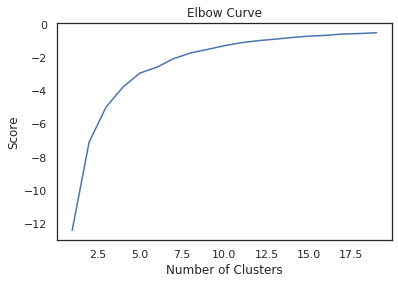

In [24]:
from sklearn.cluster import KMeans
Nc = range(1, 20)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

score

plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

# pl.show()

In [40]:
kmeans = KMeans(n_clusters=3).fit(df)


In [41]:
df["label"] = kmeans.labels_

In [42]:
df['MERCHANT_BASE'] = d.MERCHANT_BASE

In [43]:
df.columns = ["mean_txn", "min_txn", "max_txn", "label", "merchant_base"]

In [44]:
df

mean_txn   min_txn   max_txn  label       merchant_base
0   0.202822  0.174979  0.625156      1             13_COIN
1   0.032134  0.000845  0.757410      0           AUBONPAIN
2   0.338192  0.032122  1.000000      0          BANANALEAF
3   0.880712  0.359256  0.983811      2         BANKLANGNAM
4   0.258089  0.002536  0.890411      0          BARBQPLAZA
5   0.139807  0.000845  0.951930      0         BLACKCANYON
6   0.228066  0.024091  0.707223      0             BONCHON
7   0.361102  0.053254  0.874471      0         BOONTONGKEE
8   0.572101  0.298394  0.999253      2                 BUA
9   0.033360  0.000000  0.678456      0          BURGERKING
10  0.645028  0.053254  0.966625      2            CHOKCHAI
11  0.453598  0.127642  0.983562      2                COCA
12  0.100695  0.006762  0.350685      1        COCO_ICHIBAN
13  0.338200  0.006205  0.982316      0      COFFEEBEANSDAO
14  0.140645  0.001691  0.525529      1        CRG_CHABUTON
15  0.013974  0.000845  0.346700      1       CRG_COLDSTONE
16  0.200527  0.000338  0.897151      0          CRG_OOTOYA
17  0.073075  0.000845  0.286924      1     CRG_PEPPERLUNCH
18  0.173034  0.000845  0.665006      0         CRG_TERRACE
19  0.066876  0.000000  0.286924      1       CRG_YOSHINOYA
20  0.298605  0.120879  0.851557      0            DAKGALBI
21  0.165387  0.005072  0.979452      0          DEANDELUCA
22  0.486483  0.070161  0.929514      2          DINTAIFUNG
23  0.717559  0.209637  0.990785      2         FOURSEASONS
24  0.271598  0.002536  0.995766      0                FUJI
25  0.659712  0.044801  0.998007      2            GOODVIEW
26  0.439140  0.131868  0.906102      2             HONGMIN
27  0.654757  0.164269  0.997442      2             HONMONO
28  0.422301  0.328757  0.380075      1              HOTPOT
29  0.449478  0.028740  0.991781      0         HUAPLACHONG
..       ...       ...       ...    ...                 ...
63  0.487658  0.109045  0.996015      2              SAVOEY
64  0.246382  0.138994  0.857783      0              SCOOZI
65  0.145603  0.000845  0.990765      0              SEEFAH
66  0.212311  0.000845  0.990535      0             SIZZLER
67  0.139681  0.000000  0.967621      0                  SP
68  0.240467  0.154320  0.498872      1           SPAGHETTI
69  0.208050  0.000228  0.959402      0           STARBUCKS
70  0.354802  0.271344  0.703113      2         SUKISHI_BBQ
71  0.250051  0.077768  0.781818      0      SUKISHI_BUFFET
72  0.180416  0.508030  0.000000      1  SUKISHI_SEOULGRILL
73  0.516383  0.040355  0.979372      2           SUSHIHANA
74  0.431485  0.027895  0.945205      0           SUSHIMASA
75  0.069312  0.000000  0.932005      0            SWENSENS
76  0.447756  0.299036  0.987900      2         TALINGPLING
77  0.317375  0.125106  0.772852      0           TEXASSUKI
78  0.138833  0.001691  0.918555      0            THEPIZZA
79  0.287456  0.092815  0.971644      0            TIMHOWAN
80  0.482109  0.142697  0.988354      2              TOHKAI
81  0.176662  0.004987  0.434869      1         VIETCUISINE
82  0.214874  0.093516  0.620174      1            YAMAGOYA
83  0.116734  0.000845  0.934247      0               YAYOI
84  0.092741  0.008453  0.412951      1             YUMSAAP
85  0.227105  0.144548  0.401494      1            YUU_JANG
86  0.594717  0.449180  0.849455      2            YUU_REST
87  0.263545  0.388132  0.139096      1           YUU_UPTOU
88  0.313418  0.129451  0.415858      1         YUU_UPTOYUU
89  0.395282  0.087067  0.995766      0             ZEN_AKA
90  0.642972  0.353339  0.763636      2       ZEN_GYU_GRILL
91  0.294124  0.010989  0.920548      0        ZEN_ON_TABLE
92  0.347391  0.015216  0.949938      0            ZEN_REST

[93 rows x 5 columns]

[Text(0, 0, '0'), Text(0, 0, '1'), Text(0, 0, '2')]

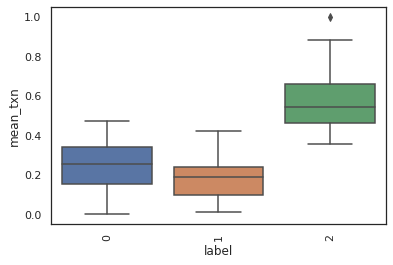

In [45]:
g = sns.boxplot(x="label", y="mean_txn", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


In [47]:
df[df.label==1]

mean_txn   min_txn   max_txn  label       merchant_base
0   0.202822  0.174979  0.625156      1             13_COIN
12  0.100695  0.006762  0.350685      1        COCO_ICHIBAN
14  0.140645  0.001691  0.525529      1        CRG_CHABUTON
15  0.013974  0.000845  0.346700      1       CRG_COLDSTONE
17  0.073075  0.000845  0.286924      1     CRG_PEPPERLUNCH
19  0.066876  0.000000  0.286924      1       CRG_YOSHINOYA
28  0.422301  0.328757  0.380075      1              HOTPOT
31  0.267580  0.256128  0.349191      1      ICHITAN_MELTME
32  0.197956  0.145393  0.563636      1     ICHITAN_ZAABELI
33  0.093364  0.000845  0.492653      1          JEFFERSTEK
34  0.248112  0.149349  0.435178      1        KALAPRAPRUEK
40  0.137403  0.003381  0.539248      1             LEECAFE
50  0.194444  0.223550  0.123039      1     OISHI_KAZOKUTEI
53  0.384424  0.940178  0.127330      1          OISHI_REST
55  0.083636  0.001691  0.626884      1            PIZZAHUT
62  0.096910  0.032967  0.519303      1        SANTAFESTEAK
68  0.240467  0.154320  0.498872      1           SPAGHETTI
72  0.180416  0.508030  0.000000      1  SUKISHI_SEOULGRILL
81  0.176662  0.004987  0.434869      1         VIETCUISINE
82  0.214874  0.093516  0.620174      1            YAMAGOYA
84  0.092741  0.008453  0.412951      1             YUMSAAP
85  0.227105  0.144548  0.401494      1            YUU_JANG
87  0.263545  0.388132  0.139096      1           YUU_UPTOU
88  0.313418  0.129451  0.415858      1         YUU_UPTOYUU

Text(0.5, 1.0, '3 Cluster K-Means')

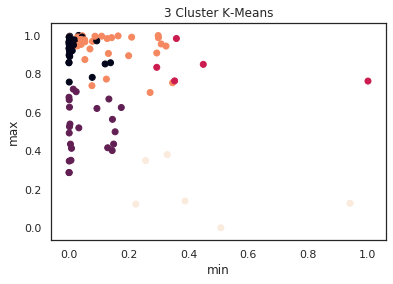

In [31]:
plt.figure('3 Cluster K-Means')

plt.scatter(df.loc[:, 'min_txn'], df.loc[:, 'max_txn'], c=kmeans.labels_)

plt.xlabel('min')

plt.ylabel('max')

plt.title('3 Cluster K-Means')

# pl.show()


In [ ]:
kmeans.labels_

In [ ]:
df.loc[:, 'mean_txn']

In [59]:
total_df.head(10)

TXN_DATE_KEY  CUSTOMER_KEY  ACCOUNT_KEY  CATEGORY_CODE  TXN_AMOUNT  \
0   27/10/2018       7206675    103100724           8021     2451.00   
1   29/10/2018       7206675    103100724           5411     1065.00   
2   31/10/2018       7206675    103100724           5631     2490.00   
3    1/10/2018       7186843    103094827           6300      319.00   
4   20/10/2018       1835566    103122926           5541      700.00   
5   15/10/2018       7221206    103122934           5541     1940.00   
6   19/10/2018       7221206    103122934           4111     1480.00   
7   27/10/2018       7221208    103122936           8211    14936.75   
8   16/10/2018       7188224    103095316           6300     1384.00   
9   16/10/2018       7188224    103095316           6300      923.00   

  ONLINEFLAG INTERFLAG     MERCHANT_LST TXN_GROUP  
0          N         N       BEAU_OTHER    RETAIL  
1          N         N       HYPM_TESCO    RETAIL  
2          N         N       FAHN_OTHER    RETAIL  
3          N         N       INSR_CIGNA    RETAIL  
4          N         N        PTRL_ESSO    RETAIL  
5          N         N       PTRL_SHELL    RETAIL  
6          N         N         HSPL_BTS    RETAIL  
7          N         N       EDUC_OTHER    RETAIL  
8          N         N  INSR_PRUDENTIAL    RETAIL  
9          N         N  INSR_PRUDENTIAL    RETAIL